# Tutorial 5 - Metropolis-Monte Carlo simulation of 2D Ising lattice

*In preparation, please review Chapter 17, up to and including section 17.4 of Landau.*

In this tutorial, you will write a code to perform a Monte Carlo simulation on a
2D Ising lattice. 

### 2D Ising model
We consider a square lattice of $N\times N$ with at each lattice point a spin $\mathbf{s}_i = \pm 1$. Following the book (Eq. 17.4), the energy for a spin configuration is
$$
E = - J \sum_{i} \sum_{j\in\text{nb}(i)} \mathbf{s}_i \cdot \mathbf{s}_j - \mu B \sum_{k} \mathbf{s}_k \qquad (1)
$$
where $\text{nb}(i)$ denotes the set of the (four: north, east, south, west) nearest neighbours of spin $i$, $J$ is the interaction strength, $\mu$ is a product of the gyromagnetic ratio and the Bohr magneton and $B$ is the magnitude of the external magnetic field. The summations over $i$ and $k$ are taken over all spins in the system.

>*In this exercise, we make the simplifications $k_B=1$, $\mu=1$ and $J=1$.*

### Metropolis Monte Carlo algoritmhm
See also Landau 17.4. The algorithm is
1. Initialize the spin configuration
1. Pick a random spin an calculate the energy change $\Delta E$ by flipping it
1. If the energy is lowered, accept the flip
1. If the energy is higher, accept the flip with probability $\exp(-\Delta E/k_BT)$, i.e. :
  1. Draw a random number $0\leq r \leq 1$from a uniform distribution
  1. Accept if $r \leq \exp(-\Delta E/k_BT)$, reject otherwise.
1. Repeat steps 2-4 for desired number of moves.

>*About the energy change:*
>
> Computational efficiency is a very important aspect in order to keep simulation times low. On that note, it is better to directly calculate the energy change $dE$ after flipping spin $i$ as $$ \Delta E = E(\text{spin $i$ flipped}) - E(\text{spin $i$ not flipped}) = 2 J \sum_{j\in\text{nb}(i)} \mathbf{s}_i \cdot \mathbf{s}_j + 2 \mu B \mathbf{s}_i \qquad (2)$$ instead of first calculating the energies using (1) for both configurations and then taking their difference. Note that here, $\mathbf{s}_i$ is the spin value before flipping.

### Preparation
- The function `generate_spin_configuration`, which creates an $N\times N$ grid containing the spins, has already been written for you. Execute the code cells below to load it into your workspace.

In [1]:
# Load these modules for this tutorial!
import matplotlib.pyplot as plt
import numpy as np
from numpy import random as rd

In [3]:
def generate_spin_configuration(N, start='hot'):
    '''
    | initialize_spins(N, start='hot')
    |
    | Generates a random spin configuration for a hot start in the Ising model
    | start='cold' provides a configuration with all spins +1
    '''
    if (start=='cold'):
        return np.ones((N, N), dtype=int)
    elif (start=='hot'):
        return rd.choice([-1, 1], size=(N, N))

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[2, 0, 1],
       [5, 3, 4],
       [8, 6, 7]])

### Implementing the Metropolis Monte Carlo algorithm 
- Complete the function `MonteCarlo` in the code cell below. It should execute a single MonteCarlo step, where you select a random spin to flip and use the Metropolis criterion to determine whether the flip will be accepted or not. Some comments are provided to help you structure the function.

- Complete the function `calculate_properties` such that it returns the internal energy $$U = \sum_{i} \sum_{j\in\text{nb}(i)} \mathbf{s}_i \cdot \mathbf{s}_j$$ and magnetization $$M= \left|\sum_{k} \mathbf{s}_k\right|.$$

In [89]:
def MonteCarlo(s, T=1., B=0):
    '''
    | MonteCarlo(s, T=1., B=0)
    |
    | Performs a monte carlo step on a spin system s at specified temperature T 
    | and magnetic field B. Flips a single spin based on the Metropolis criterion
    '''
    mu = 1
    J = 1
    
    # Extract the grid size from the lattice s 
    N = s.shape[0]
    
    # Pick an arbitary spin to try and flip
    x_max, y_max = s.shape
    x = rd.randint(x_max)
    y = rd.randint(y_max)

    # Calculate the energy change
    delta_E = 2*J*(s[x-1][y]+s[x][y-1]+s[(x+1)%x_max][y]+s[x][(y+1)%y_max])*(s[x][y]+2*mu*B*s[x][y])

    # Accept the flip or not?
    if delta_E < 0 or rd.random() <= np.exp(-(abs(delta_E)/T)):
        s[x][y] *= -1    
    
    return s
    
    
def calculate_properties(s):
    '''
    | calculate_properties(s)
    |
    | returns the internal energy and the magnetization of spin system s
    '''
    # Calculate the internal energy U
    u = np.roll(s.copy(), 1, axis=0)
    d = np.roll(s.copy(), -1, axis=0)
    l = np.roll(s.copy(), 1, axis=1)
    r = np.roll(s.copy(), -1, axis=1)
    
    U = np.sum(s*(u+d+l+r))
    
    # Calculate the magnetization M
    M = abs(np.sum(s))
    
    return U, M 


### Transient behaviour
Time to do some simulations! 
  - In the following, use $N=50$*, $B=0$ and $T=1$.
  
  - Starting from a random spin configuration (a 'hot' start), carry out $100N^2$ MC steps. 
  - Every 100 steps, store the internal energy and magnetization. 
  - Create plots of $U/N^2$ and $M/N^2$ versus the number of MC moves. You should see some form of convergence in the energy. Can you explain what happens with the magnetization?

*If the simulations take very long, try to lower $N$ or to optimize your code! It should take at most a few tens of seconds!


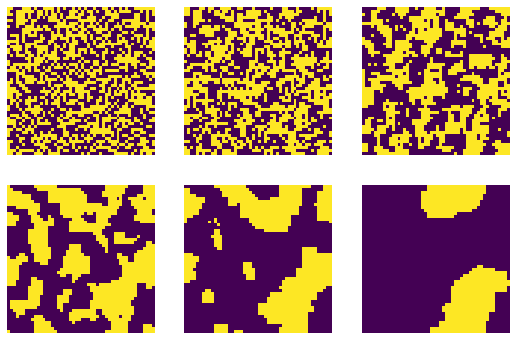

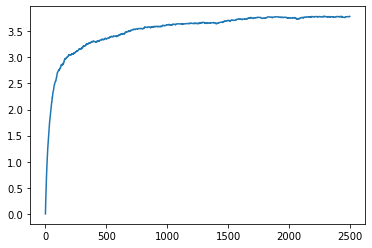

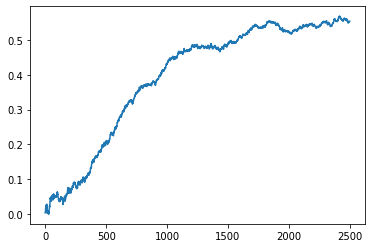

In [90]:
N = 50
B = 0.
T = 1.

Us = []
Ms = []

# Change the number of moves!
num_moves = 100*N**2

# Seed the RNG
rd.seed()
  
# Generate the N random spins
s = generate_spin_configuration(N, start='hot')

# Generate a figure that will show the configurations
_, ax = plt.subplots(2, 3, figsize=(9,6))
[axi.set_axis_off() for axi in ax.ravel()]
  
# Monte Carlo moves  
for move in range(num_moves):
    # Perform a Monte Carlo step
    s = MonteCarlo(s, T, B)    
    
    # Store U and M every 100th step
    if move%100==0:
        U, M = calculate_properties(s)
        Us.append(U)
        Ms.append(M)
        
    #show = np.linspace(0, num_moves, 6)
    show = np.logspace(3, np.log10(num_moves), 5, base=10)
    # This will show the configurations after each number of moves
    # You have to edit the 0 to whichever number you like
    if move==0:              ax[0,0].imshow(s)
    if move==int(show[0]):   ax[0,1].imshow(s)
    if move==int(show[1]):   ax[0,2].imshow(s)
    if move==int(show[2]):   ax[1,0].imshow(s)
    if move==int(show[3]):   ax[1,1].imshow(s)
    if move==int(show[4]):   ax[1,2].imshow(s)    
      
      
# Plot the average energy and magnetizations
fig1 = plt.figure()
plt.plot(np.arange(0,len(Us)), np.array(Us)/N**2)
plt.show()
fig2 = plt.figure()
plt.plot(np.arange(0,len(Ms)), np.array(Ms)/N**2)
plt.show()

### Thermodynamic properties
This time, we are going to vary the temperature to study thermodynamic properties of the spin system. **Set $N=10$ in order to decrease simulation times.** Carry out the following
- Place the code from the previous within a for loop that runs over temperature values `np.linspace(1., 4., 15)`.
- For each temperature:
  - equilibrate the system by performing $100N^2$ MC moves.
  - perform another $100N^2$ steps and calculate the average internal energy $\langle U \rangle$, the average square energy $\langle U^2 \rangle$ and the magnetization $\langle M \rangle$ over these steps (keep summing during the loop and divide by the number of terms in your sum - i.e., $100N^2$ - afterwards to get the average).
  - store the values of $\langle U \rangle$, $\langle M \rangle$ and the specific heat $C$, defined as $$C = \frac{\langle U^2 \rangle - \langle U \rangle^2}{T^2}$$
  for this temperature.
- Create a plot of the $\langle U \rangle$, $\langle M \rangle$ and $C$ versus temperature. At which temperature you observe a phase transition? What happens physically?

- Change the magnetic field and repeat the above (both transient behaviour and thermodynamic properties). Do the results change according to your expectation?
  

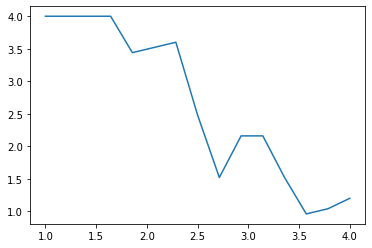

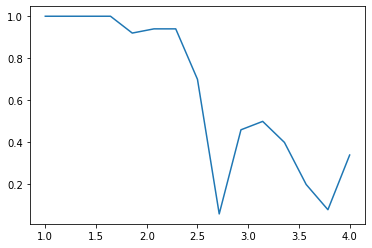

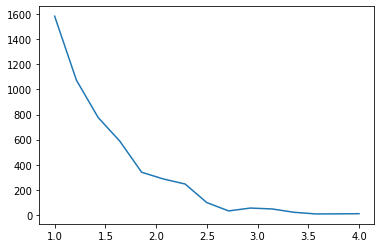

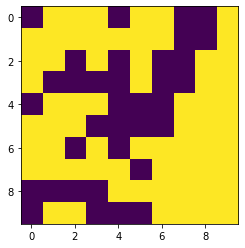

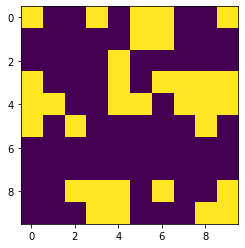

In [93]:
# 2D Ising model
N = 10
B = 0.
Tvals = np.linspace(1., 4., 15)

num_moves = 100 * N**2

U = []
U2 = []
M = []
C = []

s_start = None
s_end = None

#### Temperature loop
for T in Tvals:
     
    # Generate the random spin configuration and variables for the summation
    s = generate_spin_configuration(N)
   
    # Equilibration    
    for move in range(num_moves):
        # Do Monte Carlo steps for equilibration 
        s = MonteCarlo(s, T, B) 
    s_start = s.copy()
    # Production MC
    for move in range(num_moves):
        # Monte Carlo and summing properties
        s = MonteCarlo(s, T, B) 
    s_end = s.copy()
    # Calculate thermodynamic properties for this temperature
    u, m = calculate_properties(s)
    U.append(u/N**2)
    M.append(m/N**2)
    U2.append(u**2/N**2)
    C.append((U2[-1]-U[-1]**2)/T**2)
    

# Plot the results
fig1 = plt.figure()
plt.plot(Tvals, U)
plt.show()

fig2 = plt.figure()
plt.plot(Tvals, M)
plt.show()

fig3 = plt.figure()
plt.plot(Tvals, C)
plt.show()

fig4 = plt.figure()
plt.imshow(s_start)
plt.show()

fig5 = plt.figure()
plt.imshow(s_end)
plt.show()